<a href="https://colab.research.google.com/github/Chaitra-B-V/EDA-ApacheBeam/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis for Census Income Dataset**

In [ ]:
!pip install basemap
!pip3 install pandas matplotlib seaborn geopandas 
!pip3 install scikit-learn scipy bioinfokit 
!pip3 install descartes
!pip install pygal_maps_world
!pip install squarify
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
# General packages
import itertools
import pandas as pd
import numpy as np
# Packages for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# Packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, 
    AgglomerativeClustering)
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import bioinfokit.visuz
from mpl_toolkits.basemap import Basemap
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Welcome to census Data


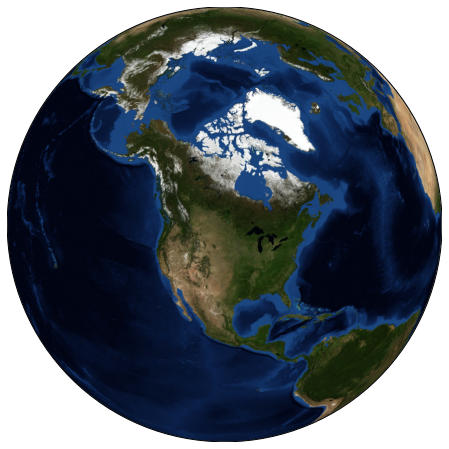

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);
print("Welcome to census Data")

1. Title of Database: Census Income

2. Sources:
    UC Irvine machine learning repository
   https://archive-beta.ics.uci.edu/ml/datasets/census+income

3. Number of Attributes 
   6 continuous, 8 nominal attributes.

4. Attribute Information: 

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

8. Missing Attribute Values: 

   7% have missing values.

9. Class Distribution: 

 Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)




**Welcome to EDA Process with Census Data**

In [ ]:
d=pd.read_csv("https://raw.githubusercontent.com/Chaitra-B-V/EDA-ApacheBeam/893c27c35f5086bb4ed9326cd376048bc7d9aa12/adult.csv", encoding = 'latin-1')
print(d.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [ ]:
d.columns=['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation','relationship','race','sex',
           'capital-gain','capital-loss','hours-per-week','native-country','class']
print("columns=", d.columns)
print("shape of the data",d.shape)

columns= Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
shape of the data (32560, 15)


In [ ]:
d.shape

(32560, 15)

Replacing '?' with nan values

In [ ]:
d.replace({' ?':np.nan},inplace=True)

Statistical Summary

In [ ]:
d.describe() 

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Summary of categorial values

In [ ]:
d.describe(include=object)

workclass education       marital-status       occupation relationship  \
count      32560     32560                32560            32560        32560   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native-country   class  
count    32560  32560           32560   32560  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27815  21789           29169   24719

Handling Missing Data

In [ ]:
print("Missing values in data: \n")
d.isnull().sum()


Missing values in data: 



age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [ ]:
#Instead of imputing with mean, median or mode i am filling it with Unknown.
d['native-country'].fillna('Unknown', inplace=True)
d['occupation'].fillna('Unknown', inplace=True)
d['workclass'].fillna('Unknown', inplace=True)

Histogram For Age: We can depict from the below graph that majority of individuals are 25 to 35 years old

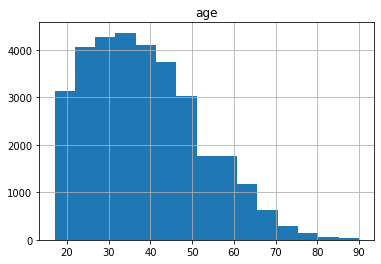

In [ ]:
d.hist(column="age",bins=15)
plt.show()

Majority of population work 40 hours per week

In [ ]:
d.hist(column="hours-per-week",bins=15)
plt.show()

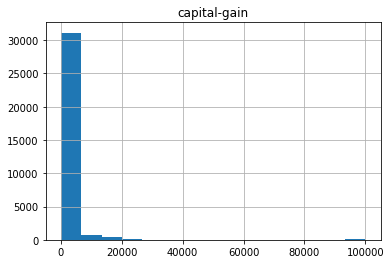

In [96]:
d.hist(column="capital-gain",bins=15)
plt.show()

there is no much capital gain

In [98]:
print(d['workclass'].value_counts())
print(d['workclass'].value_counts(normalize=True))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64


Creating two new columns as a flag for population with greater or lesser than 50K

In [99]:
IncomeGreaterThan50K = {" >50K" : 1,
                     " <=50K" : 0}                   
print(IncomeGreaterThan50K)

IncomeLessThan50K = {" >50K": 0,
" <=50K": 1}
print(IncomeLessThan50K)

{' >50K': 1, ' <=50K': 0}
{' >50K': 0, ' <=50K': 1}


In [100]:
d['IncomeGreaterThan50K']=d['class'].map(IncomeGreaterThan50K)
d['IncomeLessThan50K']=d['class'].map(IncomeLessThan50K)

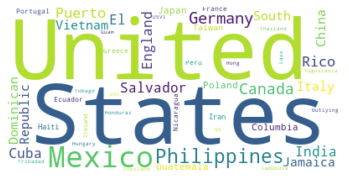

In [101]:
from wordcloud import WordCloud
#Creating the text variable

text2 = " ".join(title for title in d['native-country'])

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

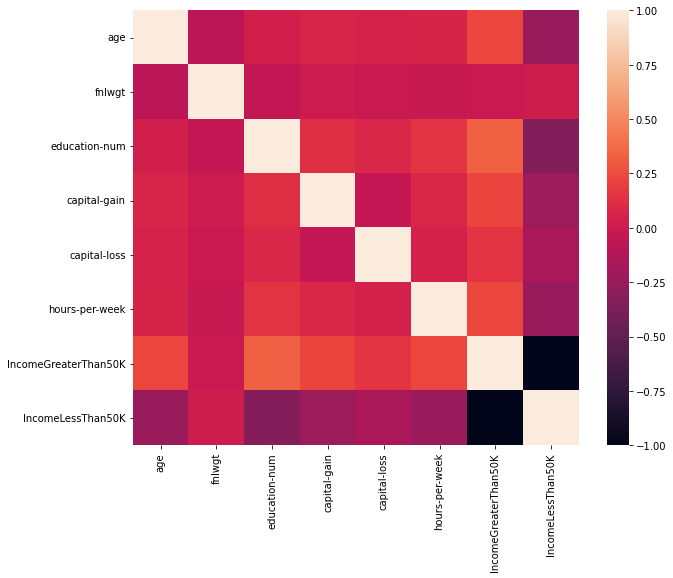

In [102]:
f, ax = plt.subplots(figsize=(10, 8))
corr = d.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Pair Plot - To visualize pairwise relationship of the variables

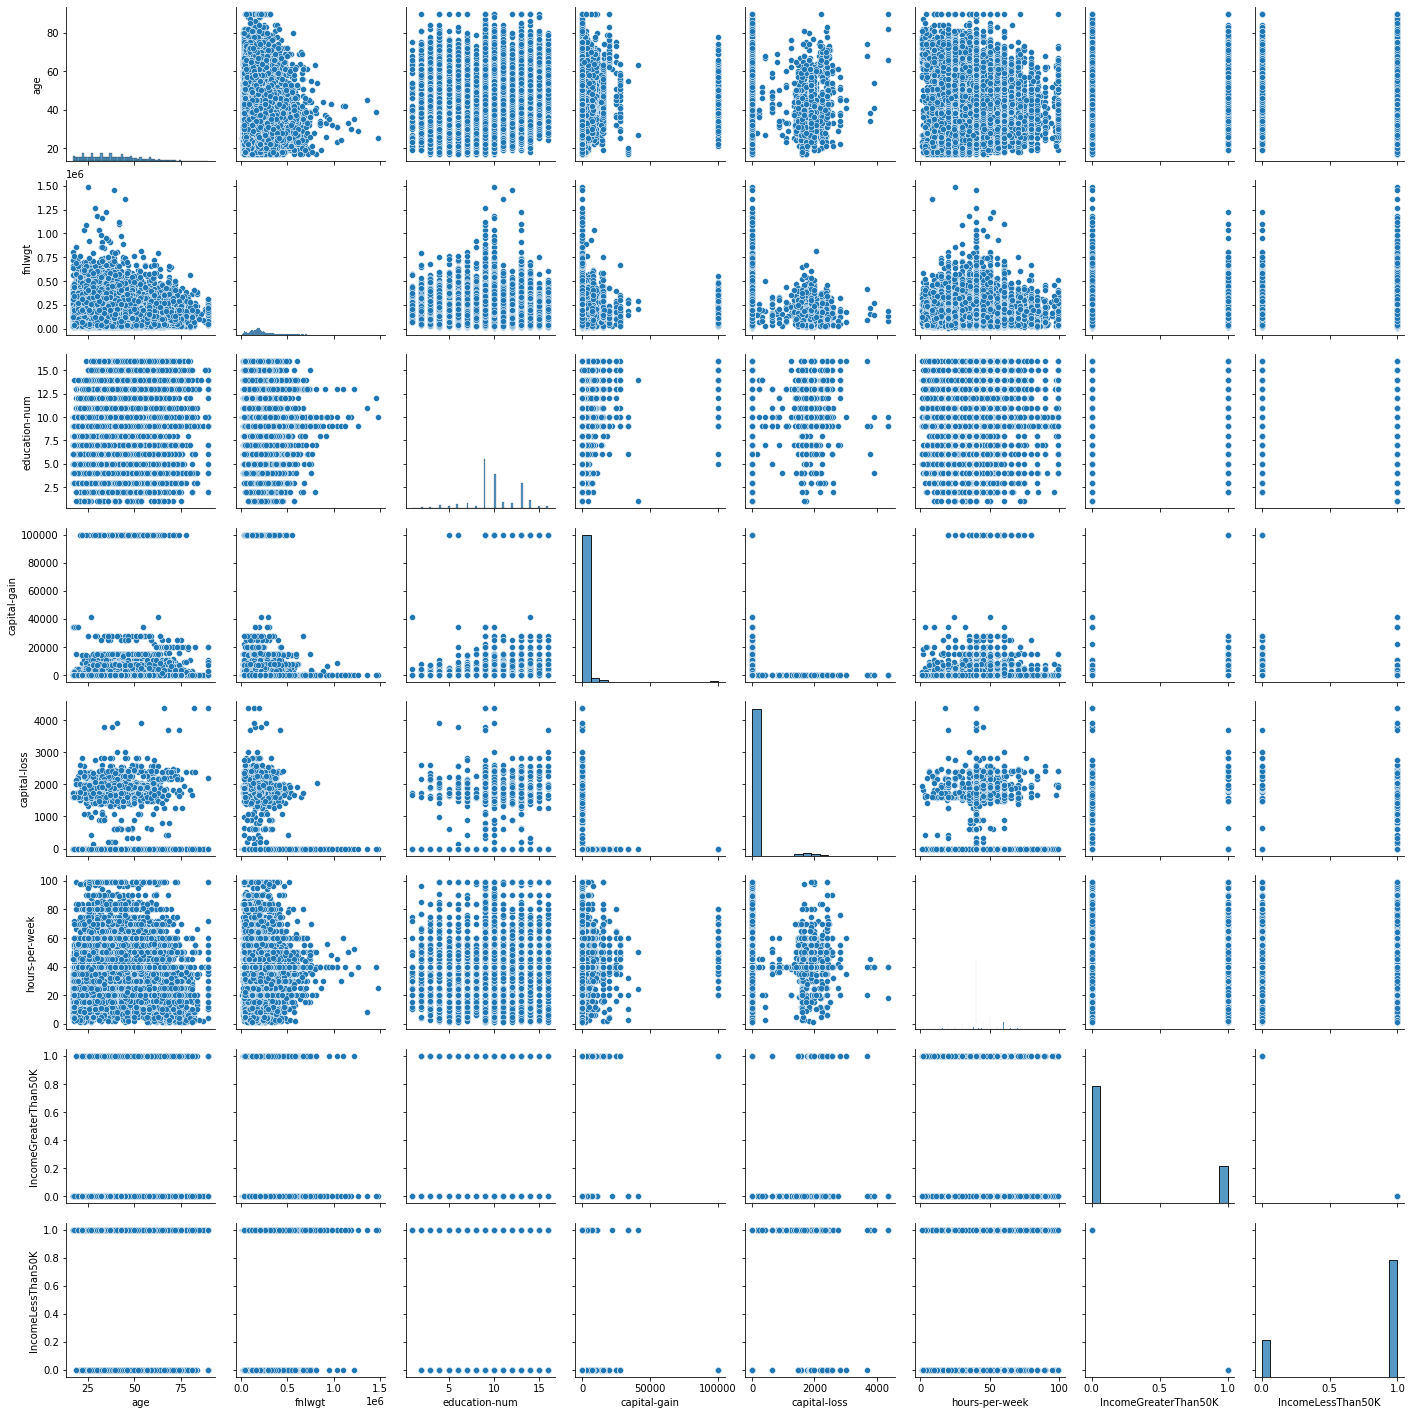

In [103]:
sns.pairplot(d,markers=d['class'])
plt.show()


Count of countries in the dataset

In [104]:
print(d['native-country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [105]:
d.head(5)

age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  \
0             0             0              13   United-States   <=50K   
1             0             0              40   United-States   <=50K   
2             0             0              40   United-States   <=50K   
3             0             0              40            Cuba   <=50K   
4             0             0              40   United-States   <=50K   

   IncomeGreaterThan50K  IncomeLessThan50K  
0                     0                  1  
1                     0                  1  
2                     0                  1  
3                     0                  1  
4                     0                  1

No of Males and females in the dataset

In [106]:
print(d['sex'].value_counts())
print(d['sex'].value_counts(normalize=True))

 Male      21789
 Female    10771
Name: sex, dtype: int64
 Male      0.669195
 Female    0.330805
Name: sex, dtype: float64


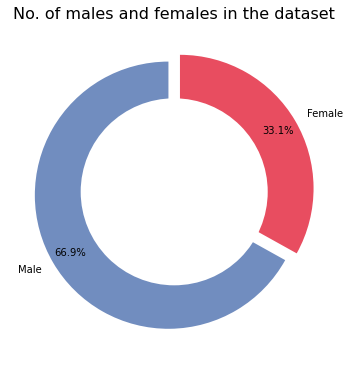

In [107]:
from bokeh.palettes import GnBu3, OrRd3
colors = [ "#718dbf", "#e84d60","#c9d9d3"]
labels = ['Male','Female']
my_colors = ["#718dbf", "#e84d60","#c9d9d3" "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
#colors = my_colors
explode = (0.05,0.05)

plt.figure(figsize=(5,5))
plt.pie(d['sex'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("No. of males and females in the dataset", size = "16")
plt.show()

No. of males and females with income greater than 50K

In [108]:
print(pd.crosstab(d["sex"], 
                  d["class"]))

class     <=50K   >50K
sex                   
 Female    9592   1179
 Male     15127   6662


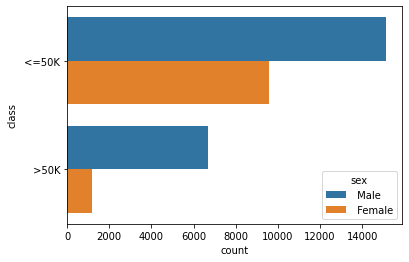

In [109]:
sns.countplot(data=d, y="class", hue="sex")

Most Popular Workclass

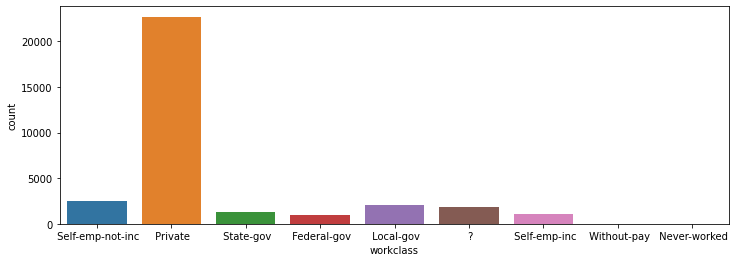

In [110]:
plt.figure(figsize=(12,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x=d["workclass"])
plt.show()

Age of Individuals along with their country of residence
-> we can deduce that Hungry has larger range of people age 30 to 60

In [111]:
d=d.sort_values(by='native-country')
plt.figure(figsize=(8,8))
sns.boxplot(x='age',y='native-country',data=d)
plt.show()


In [115]:
# Import reset_output (only needed once) 
from bokeh.plotting import reset_output
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
# Use reset_output() between subsequent show() calls, as needed
output_notebook()
grouped = d.groupby('occupation')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum()
source = ColumnDataSource(grouped)
countries = source.data['occupation'].tolist()
p = figure(x_range=countries,plot_width=800)
p.xaxis.major_label_orientation = 3.14/4
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, Turbo256
color_map = factor_cmap(field_name='occupation',
                    palette=Viridis[11], factors=countries)

p.vbar(x='occupation', top='IncomeGreaterThan50K', source=source, width=0.9, color=color_map)

p.title.text ='No. of Individuals who earn more than 50K, Occupation Wise'
p.xaxis.axis_label = 'Occupation'
p.yaxis.axis_label = 'Income Greater than 50K'
hover = HoverTool()
hover.tooltips = [
    ("Counts","Income greater than 50K: @IncomeGreaterThan50K  / Income less than 50K:@IncomeLessThan50K / Occupation: @occupation")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

population with occupation Exec-Managerial has more occurence with respect to income greater than 50K   

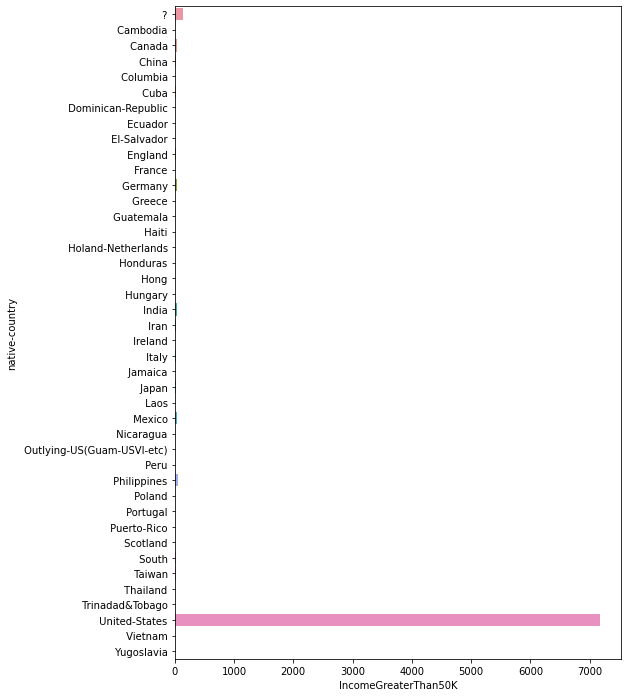

In [112]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import FactorRange
output_notebook()
f1 = pd.DataFrame() 
f1 = d.groupby('native-country')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum().reset_index()
f1=f1.sort_values(by='native-country')
plt.figure(figsize=(8,12))
sns.barplot(x='IncomeGreaterThan50K',y='native-country',data=f1)
plt.show()

The dataset has US at highest frequency. 

In [113]:
#plot = d.plot.pie(subplots=True, figsize=(11, 6))

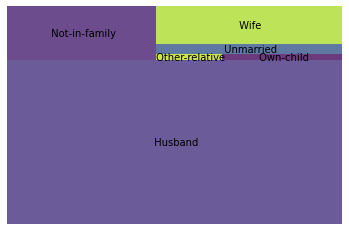

In [114]:
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt
 

 
a = d.groupby('relationship')[['IncomeGreaterThan50K']].sum().index.get_level_values(0).tolist()
 
d1 = d.groupby('relationship')[['IncomeGreaterThan50K']].sum().reset_index().IncomeGreaterThan50K.values.tolist()
 
squarify.plot(sizes=d1,label=a, alpha=0.8,norm_x=500,norm_y=2000)
plt.axis('off')
plt.show()

This graph has interactivity such as pinch and zoom

In [116]:
grouped1 = d.groupby('education')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum()
source = ColumnDataSource(grouped1)
countries = source.data['education'].tolist()
p = figure(x_range=countries,plot_width=800)
p.xaxis.major_label_orientation = 3.14/4
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, Turbo256
color_map = factor_cmap(field_name='education',
                    palette=Turbo256, factors=countries)

p.vbar(x='education', top='IncomeLessThan50K', source=source, width=0.9, color=color_map)

p.title.text ='No. of Individuals who earn less than 50K, Education Wise'
p.xaxis.axis_label = 'education'
p.yaxis.axis_label = 'Income Greater than 50K'
hover = HoverTool()
hover.tooltips = [
    ("Counts","Income greater than 50K: @IncomeGreaterThan50K  / Income less than 50K:@IncomeLessThan50K / education: @education")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

Most people are HS-grad

In [117]:
from string import Template

import IPython.display as dp
import pandas as pd

In [118]:
df=d.copy()

In [121]:
df.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education               category
education-num              int64
marital-status            object
occupation                object
relationship              object
race                      object
sex                       object
capital-gain               int64
capital-loss               int64
hours-per-week          category
native-country            object
class                     object
IncomeGreaterThan50K       int64
IncomeLessThan50K          int64
dtype: object

In [134]:
#grouped1 = d.groupby('education')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum()
cols = ['IncomeGreaterThan50K','IncomeLessThan50K',"hours-per-week"]
df[cols] = df[cols].astype(int)

cols = ["education",'race','relationship','marital-status']
df[cols] = df[cols].astype(pd.StringDtype(storage="pyarrow"))
df[cols] = df[cols].astype("category")

In [147]:
s = Template(
    r"""
<style>
  @import url('https://fonts.googleapis.com/css2?family=IBM+Plex+Mono&family=IBM+Plex+Sans&display=swap');

  *,
  *::before,
  *::after {
    box-sizing: border-box;
    margin: 0;
    padding: 0;
  }

  #$id {
    text-align: center;
  }

  #$id .axis.x line {
    display: none;
  }

  #$id .axis text {
    font-weight: bold;
    font-family: 'IBM Plex Mono', monospace;
    text-transform: capitalize;
  }
</style>

<div id="$id"></div>

<script type="module">
  'use strict';
  import * as d3 from 'https://cdn.skypack.dev/d3';
  (async () => {
    const data = d3.csvParse(`$df`, d3.autoType);

    const margin = { top: 40, right: 40, bottom: 40, left: 40 };
    const [w, h] = [800, 500];

    const svg = d3
      .select('#$id')
      .append('svg')
      .attr('width', w)
      .attr('height', h);

    const g = d3.flatRollup(
      data,
      v => d3.mean(v, d => d['hours-per-week']),
      d => d['relationship']
    );

    const xScale = d3.scaleBand(
      g.map(i => i[0]),
      [margin.left, w - margin.right]
    );
    const yMax = Math.ceil(d3.max(g, i => i[1]) / 10) * 10;
    const yScale = d3.scaleLinear([0, yMax], [h - margin.bottom, margin.top]);

    svg
      .append('g')
      .attr('class', 'axis x')
      .attr('transform', `translate(0, ${h - margin.top})`)
      .call(d3.axisBottom(xScale));
    svg
      .append('g')
      .attr('class', 'axis y')
      .attr('transform', `translate(${margin.left}, 0)`)
      .call(d3.axisLeft(yScale).ticks(15));

    const barWidth = 80;
    svg
      .selectAll('rect')
      .data(g)
      .enter()
      .append('rect')
      .attr('width', barWidth)
      .attr('height', d => h - margin.top - yScale(d[1]))
      .attr('x', d => xScale(d[0]) + xScale.bandwidth() / 2 - barWidth / 2)
      .attr('y', d => yScale(d[1]))
      .attr('fill', '#e84d60')
      .exit()
      .remove();
    svg
      .selectAll('rect')
      .on('mouseenter', function () {
        d3.select(this).transition().duration(300).attr('fill', '#08519c');
      })
      .on('mouseleave', function () {
        d3.select(this).transition().duration(300).attr('fill', '#3182bd');
      });

    svg
      .append('text')
      .text('Mean `hours per week` grouped by `relationship`')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.5rem')
      .attr('x', margin.left / 2)
      .attr('y', margin.top / 2);
    svg
      .append('text')
      .text('relationship')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.0rem')
      .style('text-anchor', 'middle')
      .attr('x', w / 2)
      .attr('y', h);
    svg
      .append('text')
      .text('Hours per week')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.0rem')
      .style('text-anchor', 'middle')
      .attr('x', margin.left / 2 - 5)
      .attr('transform', `rotate(-90, ${margin.left / 2 - 5}, ${h / 2})`)
      .attr('y', h / 2);
  })();
</script>
    """
)

dp.HTML(s.safe_substitute({"df": df.to_csv(index=False), "id": "g0"}))